In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataFloating import GetReports, CreateReportDataframes

reports = GetReports()
dfResult, dfMemory, dfOptimizations = CreateReportDataframes(reports)

In [2]:
# Target device resources available
zcu104 = {
    "LUT": 230400,
    "BRAM": 312,
    "FF": 460800,
    "URAM": 96,
    "DSP": 1728,
}

In [3]:
# Add % utilization
dfResult["BRAM%"] = dfResult["BRAM"] / zcu104["BRAM"] * 100
dfResult["DSP%"] = dfResult["DSP"] / zcu104["DSP"] * 100
dfResult["FF%"] = dfResult["FF"] / zcu104["FF"] * 100
dfResult["LUT%"] = dfResult["LUT"] / zcu104["LUT"] * 100
dfResult["URAM%"] = dfResult["URAM"] / zcu104["URAM"] * 100

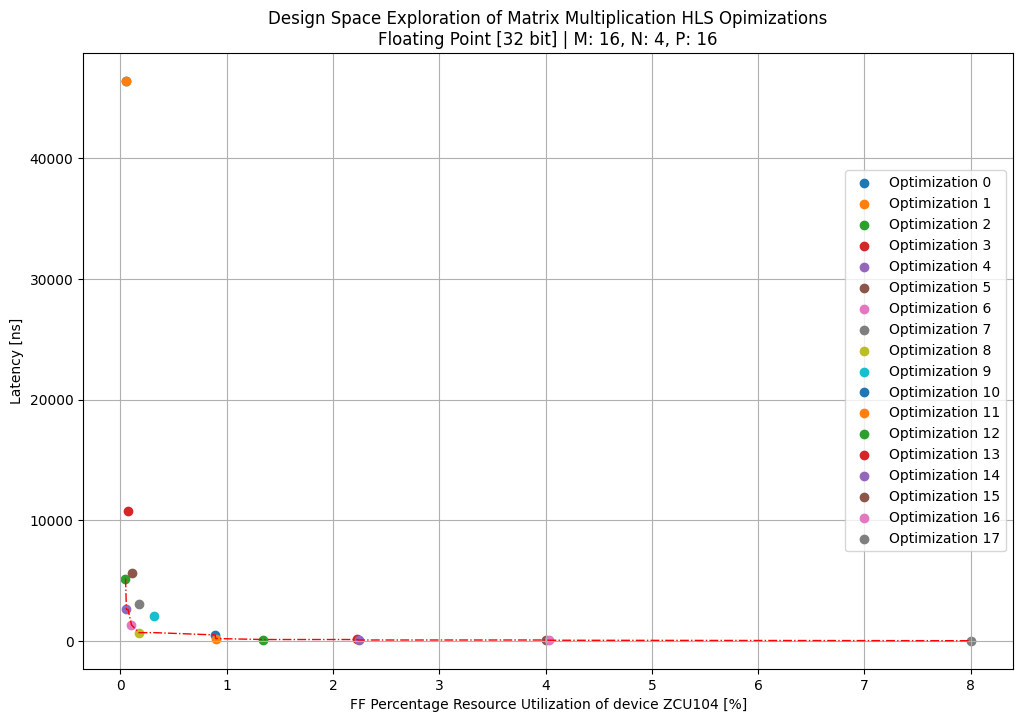

In [4]:
# Configuration
TargetX = "FF%"
TargetY = "Latency_ns"

# Calculation of Pareto Front 
sorted_idx = np.argsort(dfResult[TargetX])
x_sorted = dfResult[TargetX].iloc[sorted_idx]
y_sorted = dfResult[TargetY].iloc[sorted_idx]

## Find lower envelope points
lower_x = [x_sorted.iloc[0]]
lower_y = [y_sorted.iloc[0]]

for xi, yi in zip(x_sorted[1:], y_sorted[1:]):
    if yi < lower_y[-1]:
        lower_x.append(xi)
        lower_y.append(yi)
    else:
        # Keep previous lowest as a “step”
        lower_x.append(xi)
        lower_y.append(lower_y[-1])


# Create figure
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)

# Plot each data point seperately
handles: list[any] = []
for i in range(len(dfResult[TargetY])):
    handles.append(ax.scatter(dfResult[TargetX].iloc[i], dfResult[TargetY].iloc[i], label=dfResult.index[i]))

# Plot calculated Pareto Front
ax.plot(lower_x, lower_y, color='red', linewidth=1, linestyle="-.", label='Lower Barrier')

# Set labels
ax.legend(handles=handles, loc="center right")
ax.set_xlabel("FF Percentage Resource Utilization of device ZCU104 [%]")
ax.set_ylabel("Latency [ns]")
ax.set_title("Design Space Exploration of Matrix Multiplication HLS Opimizations\nFloating Point [32 bit] | M: 16, N: 4, P: 16")

# Enable grid
ax.grid(True)

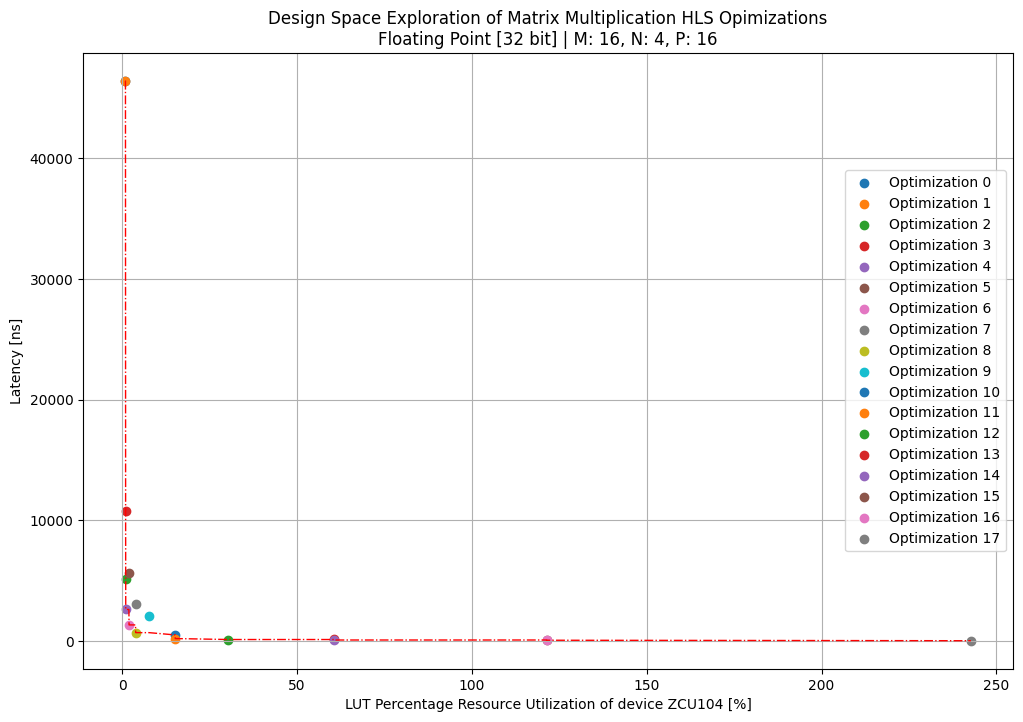

In [5]:
# Configuration
TargetX = "LUT%"
TargetY = "Latency_ns"

# Calculation of Pareto Front 
sorted_idx = np.argsort(dfResult[TargetX])
x_sorted = dfResult[TargetX].iloc[sorted_idx]
y_sorted = dfResult[TargetY].iloc[sorted_idx]

## Find lower envelope points
lower_x = [x_sorted.iloc[0]]
lower_y = [y_sorted.iloc[0]]

for xi, yi in zip(x_sorted[1:], y_sorted[1:]):
    if yi < lower_y[-1]:
        lower_x.append(xi)
        lower_y.append(yi)
    else:
        # Keep previous lowest as a “step”
        lower_x.append(xi)
        lower_y.append(lower_y[-1])


# Create figure
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)

# Plot each data point seperately
handles: list[any] = []
for i in range(len(dfResult[TargetY])):
    handles.append(ax.scatter(dfResult[TargetX].iloc[i], dfResult[TargetY].iloc[i], label=dfResult.index[i]))

# Plot calculated Pareto Front
ax.plot(lower_x, lower_y, color='red', linewidth=1, linestyle="-.", label='Lower Barrier')

# Set labels
ax.legend(handles=handles, loc="center right")
ax.set_xlabel("LUT Percentage Resource Utilization of device ZCU104 [%]")
ax.set_ylabel("Latency [ns]")
ax.set_title("Design Space Exploration of Matrix Multiplication HLS Opimizations\nFloating Point [32 bit] | M: 16, N: 4, P: 16")

# Enable grid
ax.grid(True)

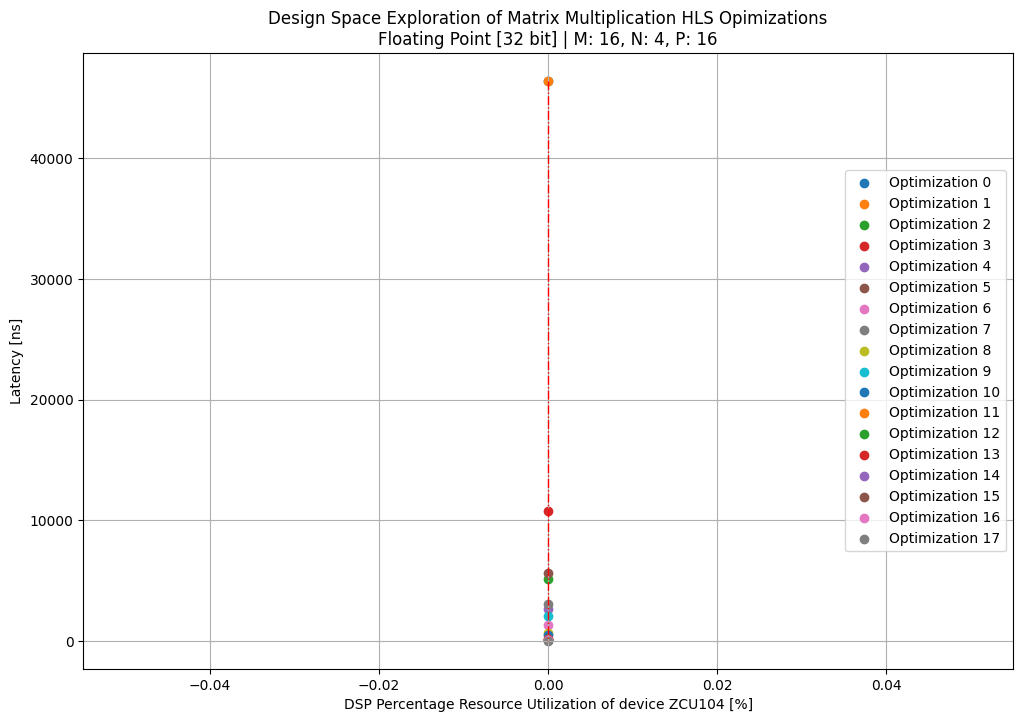

In [6]:
# Configuration
TargetX = "DSP%"
TargetY = "Latency_ns"

# Calculation of Pareto Front 
sorted_idx = np.argsort(dfResult[TargetX])
x_sorted = dfResult[TargetX].iloc[sorted_idx]
y_sorted = dfResult[TargetY].iloc[sorted_idx]

## Find lower envelope points
lower_x = [x_sorted.iloc[0]]
lower_y = [y_sorted.iloc[0]]

for xi, yi in zip(x_sorted[1:], y_sorted[1:]):
    if yi < lower_y[-1]:
        lower_x.append(xi)
        lower_y.append(yi)
    else:
        # Keep previous lowest as a “step”
        lower_x.append(xi)
        lower_y.append(lower_y[-1])


# Create figure
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)

# Plot each data point seperately
handles: list[any] = []
for i in range(len(dfResult[TargetY])):
    handles.append(ax.scatter(dfResult[TargetX].iloc[i], dfResult[TargetY].iloc[i], label=dfResult.index[i]))

# Plot calculated Pareto Front
ax.plot(lower_x, lower_y, color='red', linewidth=1, linestyle="-.", label='Lower Barrier')

# Set labels
ax.legend(handles=handles, loc="center right")
ax.set_xlabel("DSP Percentage Resource Utilization of device ZCU104 [%]")
ax.set_ylabel("Latency [ns]")
ax.set_title("Design Space Exploration of Matrix Multiplication HLS Opimizations\nFloating Point [32 bit] | M: 16, N: 4, P: 16")

# Enable grid
ax.grid(True)

In [7]:
import numpy as np

def minmax(array: np.ndarray):
    assert len(array.shape) == 1

    if np.issubdtype(array.dtype, np.integer):
        minValue = np.iinfo(array.dtype).max # Starts at the max value of type
        maxValue = np.iinfo(array.dtype).min # Starts at the min value of type
    
    if np.issubdtype(array.dtype, np.floating):
        minValue = np.finfo(array.dtype).max # Starts at the max value of type
        maxValue = np.finfo(array.dtype).min # Starts at the min value of type

    for i in range(array.shape[0]):
        if (array[i] < minValue):
            minValue = array[i]
        if (array[i] > maxValue):
            maxValue = array[i]

    return minValue, maxValue


def zNormalize(array: np.ndarray):
    assert len(array.shape) == 1

    # Precompute mean and standard deviation (std) for array.
    mean = np.mean(array)
    std = np.std(array)

    # Perform normlization
    for i in range(array.shape[0]):
        array[i] = (array[i] - mean) / std

    return array

def minMaxNormalize(array: np.ndarray):
    assert len(array.shape) == 1

    minValue, maxValue = minmax(array)

    diff = maxValue - minValue

    for i in range(array.shape[0]):
        array[i] = (array[i] - minValue) / diff

    return array

In [8]:
latency_ns_norm = minMaxNormalize(dfResult["Latency_ns"].to_numpy(dtype=np.float32, copy=True))
ff_norm = minMaxNormalize(dfResult["FF"].to_numpy(dtype=np.float32, copy=True))
lut_norm = minMaxNormalize(dfResult["LUT"].to_numpy(dtype=np.float32, copy=True))

In [9]:
latency_weight = 0.5
resource_weight = 1 - latency_weight

resource_lut_weight = zcu104["LUT"] / (zcu104["LUT"] + zcu104["FF"])
resource_ff_weight = 1 - resource_lut_weight


optimizations: np.ndarray = np.zeros(shape=latency_ns_norm.shape)
cost: np.ndarray = np.zeros(shape=latency_ns_norm.shape)
for i in range(len(cost)):
    cost[i] = latency_ns_norm[i] * latency_weight + resource_weight * (resource_ff_weight * ff_norm[i] + resource_lut_weight * lut_norm[i]) 
    optimizations[i] = i

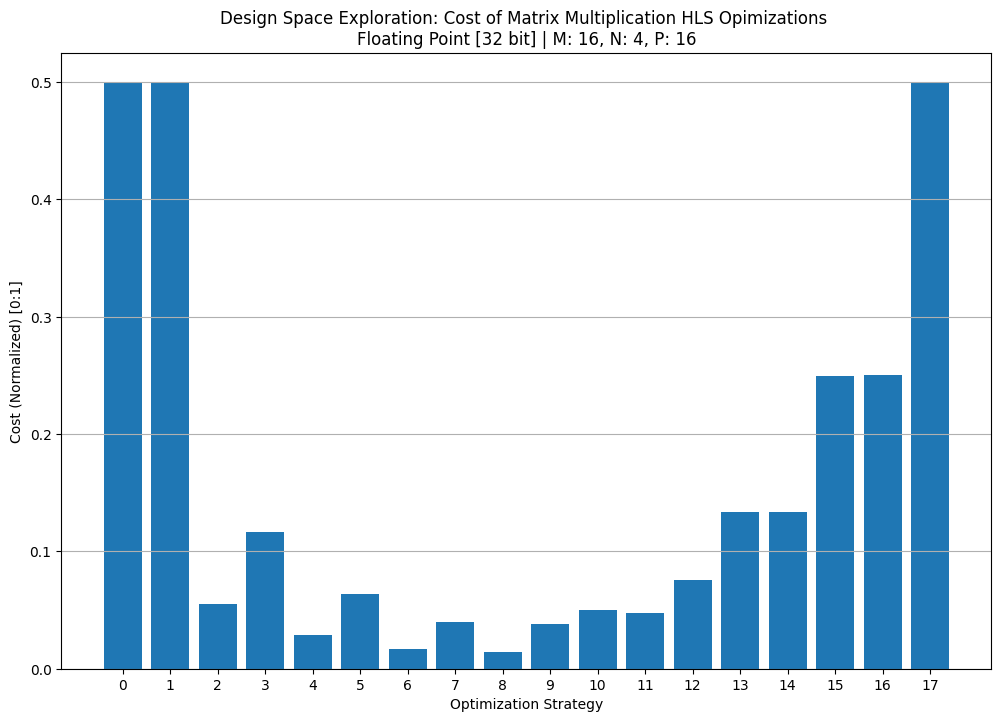

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 8)

ax = fig.add_subplot(1, 1, 1)

ax.bar(optimizations, cost)
ax.set_xticks(optimizations)
ax.set_xlabel("Optimization Strategy")
ax.set_ylabel("Cost (Normalized) [0:1]")
ax.set_title("Design Space Exploration | Cost of Matrix Multiplication HLS Opimizations \nFloating Point [32 bit] | M: 16, N: 4, P: 16")

#ax.scatter(dfResults["(FF + LUT)%"], dfResults["Latency_ns"])
ax.grid(True, axis="y")